In [3]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [5]:
# parameters
N  = 50
h0 = -np.pi/2

In [6]:
# create the dataset
X = stats.laplace_asymmetric.rvs(2,size=N)
dataMean = np.mean(X)

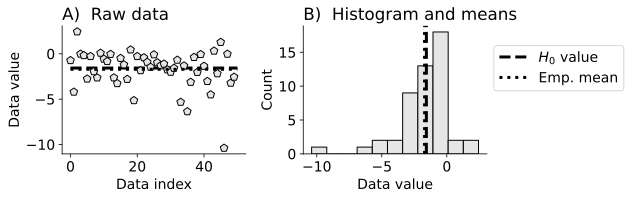

In [7]:
# plot
_,axs = plt.subplots(1,2,figsize=(9,3))

axs[0].plot(X,'kp',markersize=8,markerfacecolor=(.9,.9,.9),label='Data')
axs[0].plot([0,N],[h0,h0],'k--',zorder=-10,linewidth=3,label=r'$H_0$ value')
axs[0].plot([0,N],[dataMean,dataMean],'k:',linewidth=3,label='Emp. mean')
axs[0].set(xlabel='Data index',ylabel='Data value')
axs[0].set_title(r'A)  Raw data')

axs[1].hist(X,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1].axvline(h0,linestyle='--',color='k',linewidth=3,label=r'$H_0$ value')
axs[1].axvline(dataMean,linestyle=':',color='k',linewidth=3,label=r'Emp. mean')
axs[1].set(xlabel='Data value',ylabel='Count')
axs[1].set_title(r'B)  Histogram and means')
axs[1].legend(bbox_to_anchor=[1,.9])

# display the figure
plt.tight_layout()
plt.show()

In [8]:
# t-tests

# manual calculation
t_num = dataMean - h0
t_den = np.std(X,ddof=1) / np.sqrt(N)

tval  = t_num / t_den
pval  = 1-stats.t.cdf( np.abs(tval) ,N-1)
pval *= 2 # double it for 2-tailed test    


In [9]:
# using scipy.stats
r  = stats.ttest_1samp(X,h0)
t  = r.statistic
df = r.df
p  = r.pvalue

In [10]:
# print both results
print(f'Manual ttest: t({N-1})={tval:.3f}, p={pval:.3f}')
print(f'Scipy  ttest: t({df})={t:.3f}, p={p:.3f}')
 

Manual ttest: t(49)=-0.464, p=0.644
Scipy  ttest: t(49)=-0.464, p=0.644


# Exe 2

In [11]:
# how often do we get subthreshold results?

nExps = 500
issig = np.zeros(nExps,dtype=bool) 
means = np.zeros(nExps)
stds  = np.zeros(nExps)

In [12]:
# run the experiment
for i in range(nExps):

  # generate data and store the mean/std
  X = stats.laplace_asymmetric.rvs(2,size=N)
  means[i] = np.mean(X)
  stds[i]  = np.std(X,ddof=1)

  # run the ttest and store if "significant"
  r = stats.ttest_1samp(X,h0)
  issig[i] = r.pvalue<.05


In [13]:
# print the results
print(f'p<.05 in {np.sum(issig)}/{nExps} times.')

p<.05 in 43/500 times.


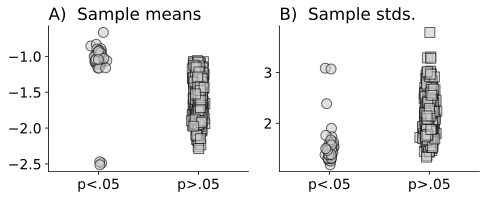

In [14]:
# plot
_,axs = plt.subplots(1,2,figsize=(7,3))

# means
axs[0].plot(np.random.randn(sum(issig))/40,means[issig],
            'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].plot(np.random.randn(sum(~issig))/40+1,means[~issig],
            'ks',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['p<.05','p>.05'],
           title=r'A)  Sample means')

# stds
axs[1].plot(np.random.randn(sum(issig))/40,stds[issig],
            'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[1].plot(np.random.randn(sum(~issig))/40+1,stds[~issig],
            'ks',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[1].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['p<.05','p>.05'],
           title=r'B)  Sample stds.')

# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [15]:
NperSample = 40
MDatasets = 25

In [16]:
# data
X = np.random.normal(loc=1,scale=1,size=(NperSample,MDatasets))

In [17]:
# confirm data size
print('Data size should be sample-size X datasets:')
print(X.shape)
     

Data size should be sample-size X datasets:
(40, 25)


In [18]:
# ttest with matrix input
ttest_matrix = stats.ttest_1samp(X,0)

In [19]:
# ttest in for-loop over each column (each dataset)
ttest_4loop = np.zeros(MDatasets)
for i in range(MDatasets):
  ttest_4loop[i] = stats.ttest_1samp(X[:,i],0).statistic
     


In [20]:
# print the results
print('Matrix  |  Vector')
print('--------|--------')
for i in range(MDatasets):
  print(f'{ttest_matrix.statistic[i]:.4f}  |  {ttest_4loop[i]:.4f}')


Matrix  |  Vector
--------|--------
7.0419  |  7.0419
5.5590  |  5.5590
4.2369  |  4.2369
4.4751  |  4.4751
5.8788  |  5.8788
5.3880  |  5.3880
6.8384  |  6.8384
8.4202  |  8.4202
7.3882  |  7.3882
6.3479  |  6.3479
5.3130  |  5.3130
5.8768  |  5.8768
5.8616  |  5.8616
5.9753  |  5.9753
6.1011  |  6.1011
5.4332  |  5.4332
7.5356  |  7.5356
5.7566  |  5.7566
7.9654  |  7.9654
4.8326  |  4.8326
5.8610  |  5.8610
5.5681  |  5.5681
5.8483  |  5.8483
8.4668  |  8.4668
6.0970  |  6.0970


# Exe 4

In [21]:
# data parameters
N = 40
k = 300


In [22]:
# list of standard deviations
stds = np.linspace(.1,3,k)

In [23]:
# initialize the t/p vectors
t = np.zeros(k)
p = np.zeros(k)
s = np.zeros(k) 

In [24]:
for i in range(len(stds)):
  X = np.random.normal(0,stds[i],size=N)
  X = X-np.mean(X) + .5 # force mean=.5
  ttest = stats.ttest_1samp(X,0)
  t[i]  = ttest.statistic
  p[i]  = ttest.pvalue

  # get the sample std 
  s[i] = np.std(X,ddof=1)

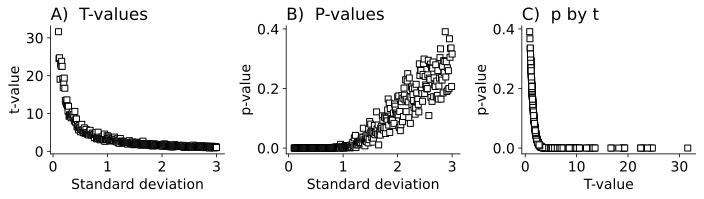

In [25]:
# plot
_,axs = plt.subplots(1,3,figsize=(10,3))

# t's
axs[0].plot(stds,t,'ks',markerfacecolor='w')
axs[0].set(xlabel='Standard deviation',ylabel='t-value',title=r'A)  T-values')

# p's
axs[1].plot(stds,p,'ks',markerfacecolor='w')
axs[1].set(xlabel='Standard deviation',ylabel='p-value',title=r'B)  P-values')

# t and p
axs[2].plot(t,p,'ks',markerfacecolor='w')
axs[2].set(xlabel='T-value',ylabel='p-value',title=r'C)  p by t')

# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [26]:
# correlation coefficient 
r = np.corrcoef(stds,s)
r

array([[1.        , 0.97177656],
       [0.97177656, 1.        ]])

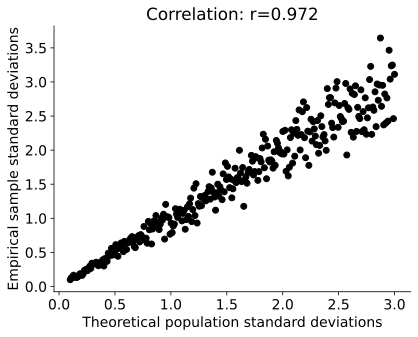

In [27]:
# plot
plt.plot(stds,s,'ko')
plt.xlabel('Theoretical population standard deviations')
plt.ylabel('Empirical sample standard deviations')
plt.title(f'Correlation: r={r[0,1]:.3f}',loc='center')

plt.show()

# Exe 6

In [28]:
nExperiments = 250
meanoffsets = np.linspace(0,.3,51)
samplesizes = np.arange(10,811,step=50)

In [29]:
# initialize
propSig = np.zeros((len(samplesizes),len(meanoffsets)))

In [30]:
# loop over sample sizes
for sidx,ssize in enumerate(samplesizes):

  # loop over effect sizes
  for eidx,effect in enumerate(meanoffsets):

    # generate the data
    X = np.random.normal(loc=effect,scale=1.5,size=(ssize,nExperiments))

    # run the t-test and store the results
    T = stats.ttest_1samp(X,0)
    propSig[sidx,eidx] = 100*np.mean( T.pvalue<.05 )

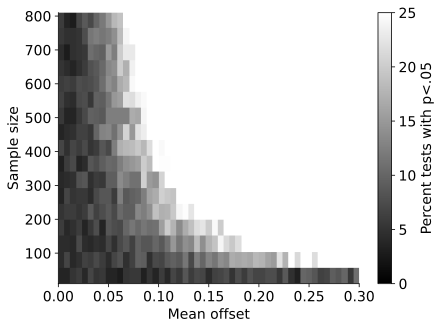

In [31]:
# visualize in a matrix
plt.imshow(propSig,extent=[meanoffsets[0],meanoffsets[-1],samplesizes[0],samplesizes[-1]],
           vmin=0,vmax=25,origin='lower',aspect='auto',cmap='gray')
plt.xlabel('Mean offset')
plt.ylabel('Sample size')
cbar = plt.colorbar()
cbar.set_label('Percent tests with p<.05')

# display the figure
plt.tight_layout()
plt.show()

# Exe 7

In [32]:
Xn = np.array([ 60, 52, 90, 20, 33, 95, 18, 47, 78, 65 ])
Xq = np.array([ 65, 60, 84, 23, 37, 95, 17, 53, 88, 66 ])
sampsize = len(Xn)

In [33]:
# simple subtraction 
Ysub = Xq-Xn

# zscore subtraction 
Ysbz = stats.zscore(Xq) - stats.zscore(Xn)

# percent change 
Ypct = 100*(Xq-Xn) / Xn

# normalized ratio 
Ynrt = (Xq-Xn) / (Xq+Xn)

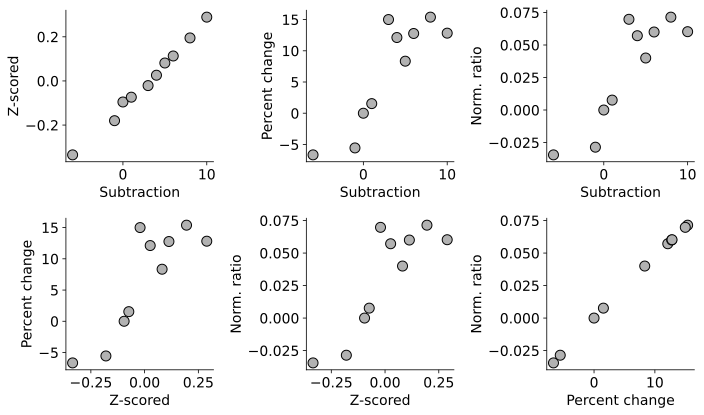

In [34]:
# plot
_,axs = plt.subplots(2,3,figsize=(10,6))
axs[0,0].plot(Ysub,Ysbz,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0,0].set(xlabel='Subtraction',ylabel='Z-scored')

axs[0,1].plot(Ysub,Ypct,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0,1].set(xlabel='Subtraction',ylabel='Percent change')

axs[0,2].plot(Ysub,Ynrt,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0,2].set(xlabel='Subtraction',ylabel='Norm. ratio')

axs[1,0].plot(Ysbz,Ypct,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[1,0].set(xlabel='Z-scored',ylabel='Percent change')

axs[1,1].plot(Ysbz,Ynrt,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[1,1].set(xlabel='Z-scored',ylabel='Norm. ratio')

axs[1,2].plot(Ypct,Ynrt,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[1,2].set(xlabel='Percent change',ylabel='Norm. ratio')

# display the figure
plt.tight_layout()
plt.show()
     


In [35]:
# t-tests
tSub = stats.ttest_1samp(Ysub,0)
tPct = stats.ttest_1samp(Ypct,0)
tsbz = stats.ttest_1samp(Ysbz,0)
tnrt = stats.ttest_1samp(Ynrt,0)

# print the results
print(f'Subtraction (Y1): t({tSub.df})={tSub.statistic:.3f}, p<{tSub.pvalue:.3f}')
print(f'Percent chg (Y2): t({tPct.df})={tPct.statistic:.3f}, p<{tPct.pvalue:.3f}')
print(f'Z subtract  (Y3): t({tsbz.df})={tsbz.statistic:.3f}, p<{tsbz.pvalue:.3f}')
print(f'Norm. ratio (Y4): t({tnrt.df})={tnrt.statistic:.3f}, p<{tnrt.pvalue:.3f}')

Subtraction (Y1): t(9)=2.023, p<0.074
Percent chg (Y2): t(9)=2.445, p<0.037
Z subtract  (Y3): t(9)=0.000, p<1.000
Norm. ratio (Y4): t(9)=2.353, p<0.043


# Exe 8

In [36]:
# parameters
mu1 = 1.2 # population mean in dataset 1
mu2 = 1   # population mean in dataset 2

In [37]:
# sample sizes
ns = np.arange(10,201,step=10)


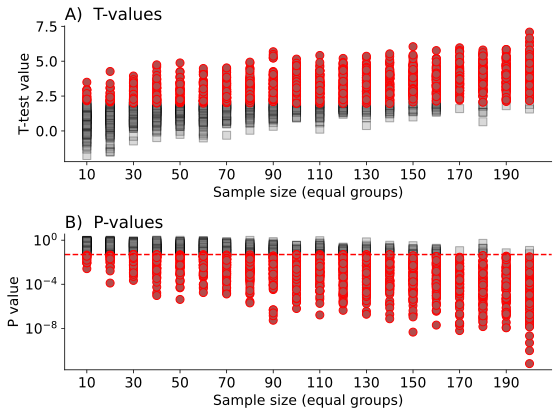

In [38]:
# setup the figure
_,axs = plt.subplots(2,1,figsize=(8,6))

# start the experiment
for ni,N in enumerate(ns):

  # generate the data (100 datasets at a time)
  data1 = np.random.normal(loc=mu1,scale=.5,size=(N,100))
  data2 = np.random.normal(loc=mu2,scale=.5,size=(N,100))

  # run the ttest
  ttest = stats.ttest_ind(data1,data2)
  t = ttest.statistic;
  p = ttest.pvalue;

  # plot the t-value, colored by significance
  axs[0].plot(np.full(np.sum(p>.05),N),t[p>.05],'ks',markersize=8,markerfacecolor=(.5,.5,.5),alpha=.3)
  axs[0].plot(np.full(np.sum(p<.05),N),t[p<.05],'ro',markersize=8,markerfacecolor=(.7,.3,.3))

  # plot the p-values
  axs[1].plot(np.full(np.sum(p>.05),N),p[p>.05],'ks',markersize=8,markerfacecolor=(.5,.5,.5),alpha=.3)
  axs[1].plot(np.full(np.sum(p<.05),N),p[p<.05],'ro',markersize=8,markerfacecolor=(.7,.3,.3))



## rest of the visualization
axs[0].set(xlabel='Sample size (equal groups)',xticks=ns[::2],ylabel='T-test value')
axs[0].set_title(r'A)  T-values')

# adjust the p-values panel
axs[1].set(xlabel='Sample size (equal groups)',xticks=ns[::2],ylabel='P value')
axs[1].set_yscale('log')
axs[1].axhline(.05,linestyle='--',color='r')
axs[1].set_title(r'B)  P-values')

# display the figure
plt.tight_layout()
plt.show()

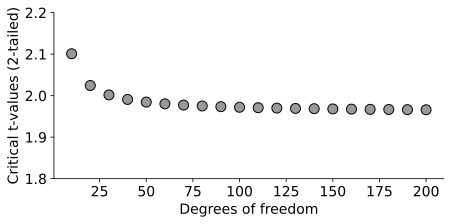

In [39]:
# compute critical t-values for the degrees of freedom
tCrit = stats.t.isf(.05/2,2*ns-2)

# plot
plt.figure(figsize=(7,3))
plt.plot(ns,tCrit,'ko',markersize=10,markerfacecolor=(.6,.6,.6))
plt.ylim([1.8,2.2])
plt.xlabel('Degrees of freedom')
plt.ylabel('Critical t-values (2-tailed)')
plt.show()

# Exe 9

In [40]:
# range of standard deviations
stdevs = np.linspace(.01,15,41)

In [41]:
# initialize results matrix
results = np.zeros((3,len(stdevs)))
tCrit = np.zeros(len(stdevs))

In [42]:
# the experiment
for si,std in enumerate(stdevs):

  # create two groups of data
  X1 = np.random.normal(loc=1,scale=1,size=50)
  X2 = np.random.normal(loc=1.1,scale=std,size=40)

  # levene's test
  results[0,si] = np.log( stats.levene(X1,X2).pvalue )

  # difference of t-values
  same_var = stats.ttest_ind(X1,X2,equal_var=True)  # equal variance
  diff_var = stats.ttest_ind(X1,X2,equal_var=False) # unequal variance
  results[1,si] = same_var.statistic # equal variance
  results[2,si] = diff_var.statistic # unequal variance


  # compute df for tCrit
  s1,s2 = np.var(X1,ddof=1),np.var(X2,ddof=1)
  n1,n2 = len(X1),len(X2)
  df_num = (s1/n1 + s2/n2)**2
  df_den = s1**2/(n1**2*(n1-1)) + s2**2/(n2**2*(n2-1))

  tCrit[si] = stats.t.isf(.05/2,df_num/df_den)


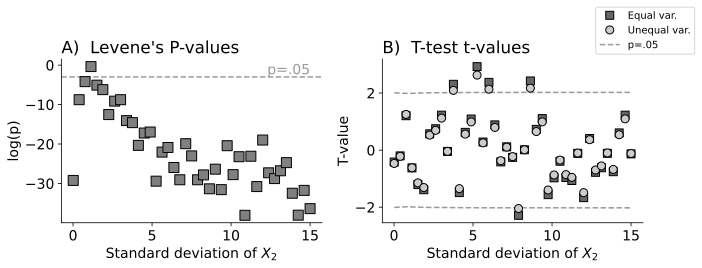

In [43]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

# levene's test results
axs[0].plot(stdevs,results[0,:],'ks',markersize=10,markerfacecolor='gray')
axs[0].axhline(np.log(.05),color=(.6,.6,.6),linestyle='--',zorder=-1)
axs[0].text(np.max(stdevs),np.log(.1),'p=.05',ha='right',color=(.6,.6,.6))
axs[0].set(xlabel=r'Standard deviation of $X_2$',ylabel='log(p)',title=r"A)  Levene's P-values")

# t-tests
axs[1].plot(stdevs,results[1,:],'ks',markersize=8,markerfacecolor=(.4,.4,.4),label='Equal var.')
axs[1].plot(stdevs,results[2,:],'ko',markersize=8,markerfacecolor=(.8,.8,.8),label='Unequal var.')
axs[1].plot(stdevs,tCrit,'--',color=(.6,.6,.6),zorder=-1,label='p=.05')
axs[1].plot(stdevs,-tCrit,'--',color=(.6,.6,.6),zorder=-1)
axs[1].set(xlabel=r'Standard deviation of $X_2$',ylabel='T-value',title=r"B)  T-test t-values")
axs[1].legend(fontsize=10,bbox_to_anchor=[.8,1])

# display the figure
plt.tight_layout()
plt.show()

# Exe 10

In [44]:
# generate the data
sigmas = np.linspace(.1,1.2,20)

# null hypothesis value
h0 = .5

# initialize the results matrices
tvals = np.zeros((2,len(sigmas)))
cents = np.zeros((2,len(sigmas)))

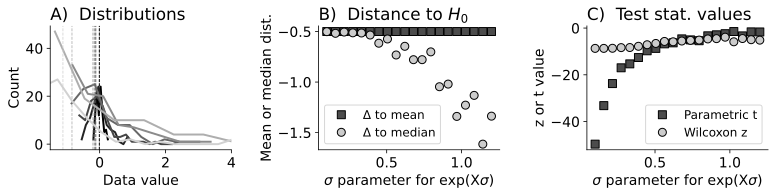

In [45]:
_,axs = plt.subplots(1,3,figsize=(11,3))



# compute and store all moments in a matrix
for i,s in enumerate(sigmas):

  # generate mean-centered data
  X = np.exp(np.random.randn(100)*s)
  X -= np.mean(X)

  # compute and store the descriptives
  cents[0,i] = np.mean(X) - h0
  cents[1,i] = np.median(X) - h0

  # draw the histogram
  if i%3==0:
    mc = len(sigmas)+2
    y,x = np.histogram(X,bins='fd')
    axs[0].plot((x[:-1]+x[1:])/2,y,color=(i/mc,i/mc,i/mc),linewidth=2)
    axs[0].axvline(np.median(X),color=(i/mc,i/mc,i/mc),linestyle='--',linewidth=.8)

  # parametric t-test
  tvals[0,i] = stats.ttest_1samp(X,h0).statistic

  # Wilcoxon test
  tvals[1,i] = stats.wilcoxon(X-h0,method='approx').zstatistic


## plot
axs[0].set(xlim=[-1.5,4],xlabel='Data value',ylabel='Count')
axs[0].set_title(r'A)  Distributions')

axs[1].plot(sigmas,cents[0,:],'ks',markersize=8,markerfacecolor=(.3,.3,.3),label=r'$\Delta$ to mean')
axs[1].plot(sigmas,cents[1,:],'ko',markersize=8,markerfacecolor=(.8,.8,.8),label=r'$\Delta$ to median')
axs[1].legend(fontsize=12)
axs[1].set(xlabel=r'$\sigma$ parameter for exp(X$\sigma$)',ylabel='Mean or median dist.')
axs[1].set_title(r'B)  Distance to $H_0$')

axs[2].plot(sigmas,tvals[0,:],'ks',markersize=8,markerfacecolor=(.3,.3,.3),label='Parametric t')
axs[2].plot(sigmas,tvals[1,:],'ko',markersize=8,markerfacecolor=(.8,.8,.8),label='Wilcoxon z')
axs[2].legend(fontsize=12)
axs[2].set(xlabel=r'$\sigma$ parameter for exp(X$\sigma$)',ylabel='z or t value')
axs[2].set_title(r'C)  Test stat. values')

# display the figure
plt.tight_layout()
plt.show()

plot showing relationship between central tendency distances and test statistic values

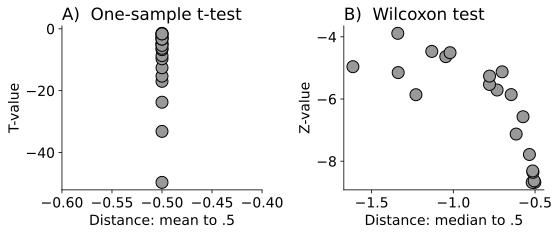

In [46]:
# plot 

_,axs = plt.subplots(1,2,figsize=(8,3.5))

axs[0].plot(cents[0,:],tvals[0,:],'ko',markersize=12,markerfacecolor=(.6,.6,.6))
axs[0].set(xlabel='Distance: mean to .5',ylabel='T-value',xlim=[-.6,-.4],
           title=r'A)  One-sample t-test')


axs[1].plot(cents[1,:],tvals[1,:],'ko',markersize=12,markerfacecolor=(.6,.6,.6))
axs[1].set(xlabel='Distance: median to .5',ylabel='Z-value',
           title=r'B)  Wilcoxon test')

# display the figure
plt.tight_layout()
plt.show()

# Exe 11

In [47]:
# params
meanoffsets = np.linspace(0,2,71)
samplesizes = np.arange(10,811,step=50)

In [48]:
# initialize
pvals = np.zeros((len(samplesizes),len(meanoffsets)))
cohend = np.zeros((len(samplesizes),len(meanoffsets)))
r2 = np.zeros((len(samplesizes),len(meanoffsets)))

In [49]:
# loop over sample sizes
for sidx,ssize in enumerate(samplesizes):

  # loop over effect sizes
  for eidx,effect in enumerate(meanoffsets):

    # generate the data
    X = np.random.normal(loc=effect,scale=1.5,size=(ssize))

    # run the t-test and store the results
    T = stats.ttest_1samp(X,0)
    pvals[sidx,eidx] = T.pvalue

    # Cohen's d
    cohend[sidx,eidx] = np.abs(  np.mean(X)/np.std(X,ddof=1)  )

    # R^2
    r2[sidx,eidx] = T.statistic**2 / (T.statistic**2 + T.df)
     


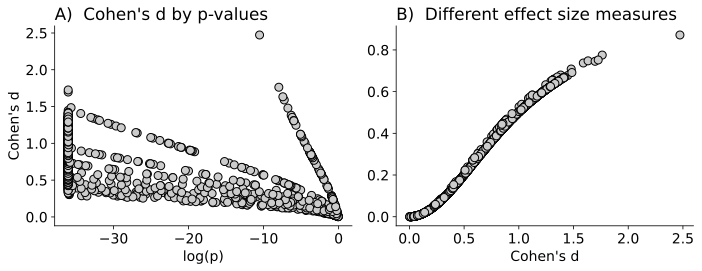

In [50]:
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(np.log(pvals+np.finfo(float).eps),cohend,'ko',markersize=8,markerfacecolor=(.8,.8,.8))
axs[0].set(xlabel='log(p)',ylabel="Cohen's d")
axs[0].set_title(r"A)  Cohen's d by p-values")

axs[1].plot(cohend,r2,'ko',markersize=8,markerfacecolor=(.8,.8,.8))
axs[1].set(xlabel="Cohen's d",ylabel=r'')
axs[1].set_title(r'B)  Different effect size measures')

# display the figure
plt.tight_layout()
plt.show()

# Exe 12

In [51]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
# list number of unique values per column
for i in data.keys():
  print(f'{i:>20} has {len(np.unique(data[i])):>3} unique values')

       fixed acidity has  96 unique values
    volatile acidity has 143 unique values
         citric acid has  80 unique values
      residual sugar has  91 unique values
           chlorides has 153 unique values
 free sulfur dioxide has  60 unique values
total sulfur dioxide has 144 unique values
             density has 436 unique values
                  pH has  89 unique values
           sulphates has  96 unique values
             alcohol has  65 unique values
             quality has   6 unique values


/tmp/ipykernel_15806/3023158206.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


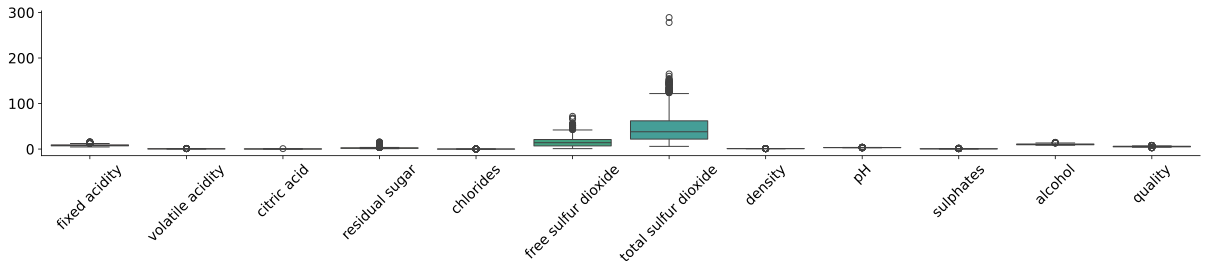

In [53]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

z-score all variables except for quality

In [54]:
# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# make a copy of the dataframe to change
dataz = data.copy()

# z-score 
for col in cols2zscore:
  meanval   = np.mean(data[col])
  stdev     = np.std(data[col],ddof=1)
  dataz[col] = (data[col]-meanval) / stdev

dataz.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,3.554936e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


/tmp/ipykernel_15806/2772181820.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


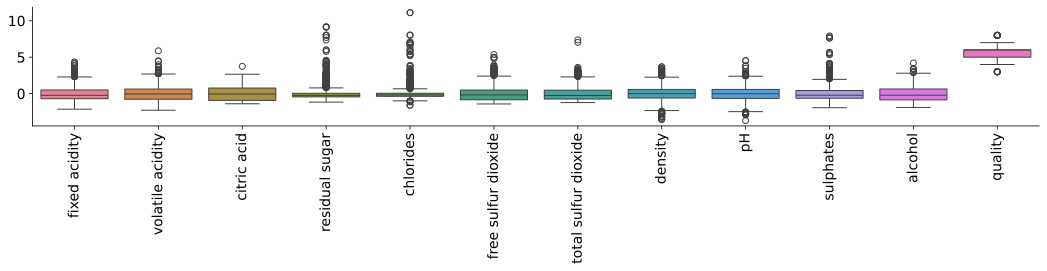

In [55]:
# check the plot again
fig,ax = plt.subplots(1,figsize=(15,4))
ax = sns.boxplot(data=dataz)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()

test each variable for normality

In [56]:
# loop through all variables
for col in cols2zscore:

  # compute and print the test
  Stest = stats.shapiro(dataz[col])
  print(f'{col:>25}: p<{Stest.pvalue:.4f}')
     


            fixed acidity: p<0.0000
         volatile acidity: p<0.0000
              citric acid: p<0.0000
           residual sugar: p<0.0000
                chlorides: p<0.0000
      free sulfur dioxide: p<0.0000
     total sulfur dioxide: p<0.0000
                  density: p<0.0000
                       pH: p<0.0000
                sulphates: p<0.0000
                  alcohol: p<0.0000


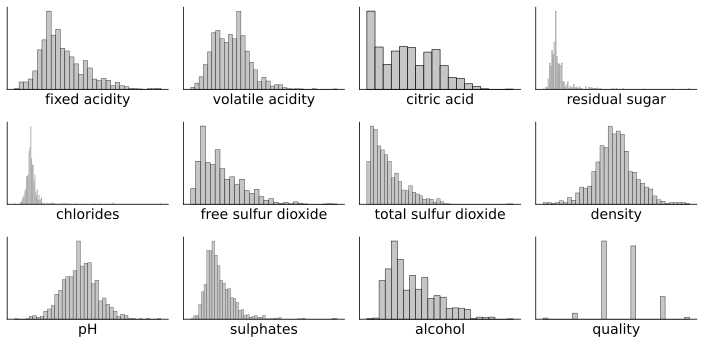

In [57]:
# plot the histograms
_,axs = plt.subplots(3,4,figsize=(10,5))

# loop through columns and create histograms
for (idx,col),a in zip(enumerate(dataz.columns),axs.flatten()):
  sns.histplot(data=dataz,x=col,ax=a,color=(.7,.7,.7))
  a.set(xticks=[],yticks=[],ylabel='')

# display the figure
plt.tight_layout()
plt.show()
     


binarize quality ratings into a new variable

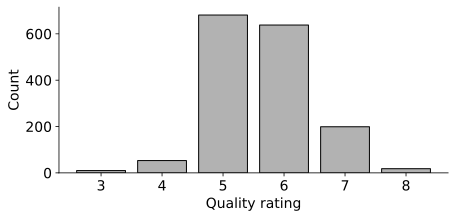

/tmp/ipykernel_15806/1894559217.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataz['boolQuality'][dataz['quality']>5] = True


,quality,boolQuality
0,5,False
1,5,False
2,5,False
3,6,True
4,5,False
...,...,...
1594,5,False
1595,6,True
1596,6,True
1597,5,False


In [58]:
fig = plt.figure(figsize=(7,3))

counts = dataz['quality'].value_counts()
plt.bar(list(counts.keys()),counts,color=(.7,.7,.7),edgecolor='k')
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
dataz['boolQuality'] = False
dataz['boolQuality'][dataz['quality']>5] = True

dataz[['quality','boolQuality']]
     


# Exe 13

In [61]:
# initialize results matrix as a dictionary
results = {}

In [62]:
# loop over column
for col in cols2zscore:

  # for convenience, extract the numerical variables
  Xh = dataz[col][dataz['boolQuality']==True].values  # high rating
  Xl = dataz[col][dataz['boolQuality']==False].values # low rating

  # compute df
  s1,s2 = np.var(Xh,ddof=1),np.var(Xl,ddof=1)
  n1,n2 = len(Xh),len(Xl)
  df_num = (s1/n1 + s2/n2)**2
  df_den = s1**2/(n1**2*(n1-1)) + s2**2/(n2**2*(n2-1))

  # run the t-test and store the results in a dictionary
  tres = stats.ttest_ind(Xh,Xl,equal_var=False)

  results[col] = { 't' : tres.statistic,
                   'p' : tres.pvalue,
                   'df': df_num/df_den }

In [63]:
# need FDR correction function
from statsmodels.stats.multitest import fdrcorrection

In [64]:
# bonferroni threshold
bonP = .05/len(cols2zscore)

# FDR correction (don't need p-values, only keep outcome)
fdrH = fdrcorrection([results[col]['p'] for col in cols2zscore],.05)[0]

# loop through columns and report the results!
for i, col in enumerate(cols2zscore):

    # extract values
    t  = results[col]['t']
    p  = results[col]['p']
    df = results[col]['df']

    # determine if significant
    issigB = [' ', '*'][p < bonP]
    issigF = [' ', '*'][fdrH[i]]

    print(f'{col:>20}: t({df:.0f})={t:6.2f}, p={p:.4f}, {issigB}{issigF}')

       fixed acidity: t(1596)=  3.86, p=0.0001, **
    volatile acidity: t(1515)=-13.48, p=0.0000, **
         citric acid: t(1593)=  6.48, p=0.0000, **
      residual sugar: t(1575)= -0.09, p=0.9311,   
           chlorides: t(1266)= -4.29, p=0.0000, **
 free sulfur dioxide: t(1523)= -2.46, p=0.0141,  *
total sulfur dioxide: t(1355)= -9.34, p=0.0000, **
             density: t(1576)= -6.55, p=0.0000, **
                  pH: t(1567)= -0.13, p=0.8962,   
           sulphates: t(1495)=  8.85, p=0.0000, **
             alcohol: t(1517)= 19.78, p=0.0000, **


/tmp/ipykernel_15806/1320752852.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  issigB = [' ', '*'][p < bonP]
/tmp/ipykernel_15806/1320752852.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  issigF = [' ', '*'][fdrH[i]]
